## 데이터 전처리 
### 이번 공부 목적
- 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
- 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 학습해보자.

### 1. 넘파이로 데이터 준비하기 
- 넘파이로 조금 더 세련된 방법을 사용해보기 

In [1]:
# 데이터 준비 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5,
               32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0,
               35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 
               11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0,
               500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
               620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0,
               975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 
               19.7, 19.9]

In [2]:
# 넘파이 패키지 임포트 
import numpy as np

In [3]:
# 넘파이의 column_stack() 함수 사용 - 예제
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

- 넘파이의 column_stack() 함수 사용 - column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례로 나란히 연결하는 역할을 함.
- 연결할 리스트는 파이썬 튜플로 전달함. - 현제 배열의 크기는 3(행)x2(열) 형식이다.

In [5]:
# 위에 물고기 데이터를 column_stack()으로 정렬한 fish_data 변수 선언 
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
# 데이터 확인
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- 위와 같이 길이와 무게 데이터를 두개의 열로 잘 정렬한 것을 볼 수 있다.
- 동일한 방법으로 넘파이를 이용해 타킷 데이터를 만들어보자 
- 이전 장에서는 원사가 하니인 리스트 [1]과 [0]을 여러번 곱해서 타깃 데이터로 만들었지만 이번에는 np.one()과 np.zeros() 함수를 사용함.

In [7]:
# ones()함수 예제
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
# zeros()함수 예제
print(np.zeros(5))

[0. 0. 0. 0. 0.]


- 해당 두 함수를 이용해 1이 35개 배열과 0이 14개인 배열을 간단히 만들 수 있다. 그런 다음 두 배열을 그대로 연결하면 된다.
- 여기에서는 np.column_stack()를 사용하지 않고 첫 번째 차원을 따라 배열을 연결하는 np.concatenate() 함수를 사용함.
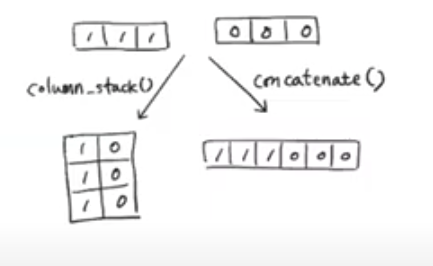

In [9]:
# 타깃 데이터 만들기 - np.concatenate()
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [10]:
# 확인
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


- 이번에는 파이썬 리스트를 이용해서 수동으로 만들지 않고 넘파이 함수를 써서 사용함.
- 현재 데이터가 작기 때문에 리스트를 수동으로 만들어도 상관없지만, 데이터가 커지면 수동으로 만드는 것을 매우 비효율 적이다, 그래서 넘파이 함수를 사용한다.

### 2. 사이킷 런으로 훈련 세트와 테스트 세트 나누기
- 앞에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나누었지만, 매우 번거로운 방법이다. 이번에는 조금 더 세련된 방법을 사용하고자 한다.
- 사이킷런은 머신러닝 모델 뿐만 아니라 다양한 유틸리티 도구도 제공한다.
- 대표적인 도구가 지금 사용할 train_test_split() 함수이다.
- train_test_split()함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눠주고, 나누기전 알아서 데이터를 섞어 준다.

In [11]:
# 패키지 임포트 
from sklearn.model_selection import train_test_split

In [12]:
# 각각 훈련세트와 테스트 세트로 나누기 - 교육 목적을 위해 random_state를 42로 설정 
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

- 사용방법은 간단하다. 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 된다.
- 앞에서 데이터를 무작위로 섞기 전에 np.random.seed() 함수를 사용해 교육 목적으로 책내용과 같게 설정했었다.
- train_test_split() 함수에서도 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수가 있다. 
- fish_data와 fish_target 2개의 배열을 전달 했으므로 2개씩 나누어 총 4개의 배열이 반한 되었다.
- 차례대로 처음 2개는 입력 데이터 (train_input, test_input), 나머지 2개는 타깃 데이터 (train_target, test_target) 이다.

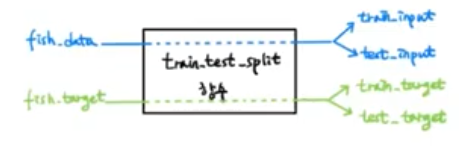


In [13]:
# 잘 나눠 졌는지 데이터 크기 확인 
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [14]:
print(train_target.shape, test_target.shape)

(36,) (13,)


- 훈련 데이터와 테스트 데이터를 각각 36개와 13개로 나누었다.
- 입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열이다.

In [15]:
# 도미와 빙어가 잘 섞였는지 테스트 데이터 출력
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 확인해본 결과 10개가 도미(1), 3개가 빙어(0) 이다. 잘 섞인 것 처럼 보이지만 비율이 조금 모자라 보인다. 
- 그 근거는 도미와 빙어의 개수가 각각 35개, 14개로 비율은 2.5:1 이지만, 테스트 세트의 비율은 3.3:1 이다. 샘플링 편향이 조금 나타났다고 볼 수 있다.
- 이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다. 특히 일부 클래스의 개수가 적을 때 이런일이 발생할 수 있다.
- train_test_split() 함수는 이런 문제를 간단히 해결하기 위해 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠준다. (훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용함.)

In [16]:
# 클래스 비율에 맞게 다시 데이터 분리 
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [18]:
# 다시 나눈후 테스트 타깃 데이터 확인
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


- 빙어가 하나 늘어 비율이 2.25:1로 비슷한 비율로 맞춰짐

### 3. 수상한 도미 한 마리 
- 위에 준비한 데이터로 똑같이 KNeighborsClassifier를 이용해 모델 훈련을 해보도록 한다.

In [19]:
# 위에 준비한 데이터로 모델 훈련후 평가하기 
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)  # 훈련
kn.score(test_input, test_target)  # 모델 평가 

1.0

In [20]:
# 책에 나온 다른 도미 데이터를 넣고 예측해보기 
print(kn.predict([[25, 150]]))

[0.]


- 위에서 준비한 데이터로 모델 훈련을 하고 정확도를 측정해보니 1.0 즉 정확도 100% 모델이 나왔다.
- 그래서 책에서 나온 다른 도미 데이터(25, 150)를 넣고 예측을 해보니 도미가 아닌 빙어로 판정이 났다.

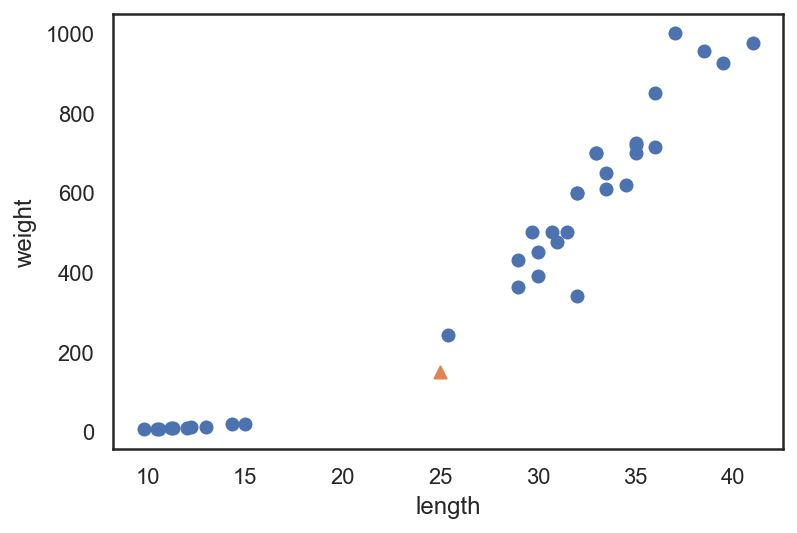

In [21]:
# 산점도 그래프로 확인해보기 
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25, 150, marker='^')  # 예측값 데이터 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 산점도 그래프를 이용해서 살펴본 결과 제공받은 샘플 데이터가 도미 데이터에 가까운 것으로 나왔다.
- 샘플의 주변 샘플을 알아보기 위해 KNeighborsClassifier 클래스에서 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 매서드를 제공한다. (참고로 이 매서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환 한다.)
- KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환 된다.

In [23]:
# kneighbors() 사용으로 샘플과 가장 가까운 이웃이 어떤 것인지 알아보기
distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


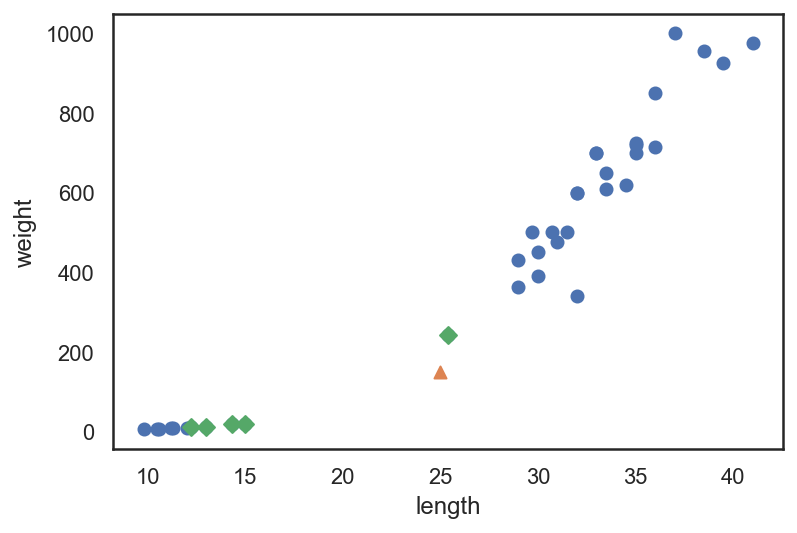

In [24]:
# 산점도 그래프로 확인해보기 
plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25, 150, marker='^')  # 예측값 데이터 
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 다이아몬드로 산점도를 지정해서 나타낸 결과 4개의 샘플은 빙어 1개의 샘플은 도미로 나타내, 예측 값이 빙어로 나올 수 밖에 없는 상황이라는 것을 확인했습니다.

In [25]:
# 직접 데이터 확인
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [26]:
# 타깃 데이터로 확인
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


- 길이가 25cm, 무게가 150g인 생선에 가장 가까운 이웃에는 빙어가 앞도적으로 많았다, 따라서 이 샘플의 클래스를 빙어로 예측하는 것도 무리가 이닌 것으로 나타났다.
- 이 문제의 해결 실마리를 찾기 위해 kneighbors() 매서드에서 반환한 distances 배열을 출력해보자.

In [27]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 4. 기준을 맞춰라 
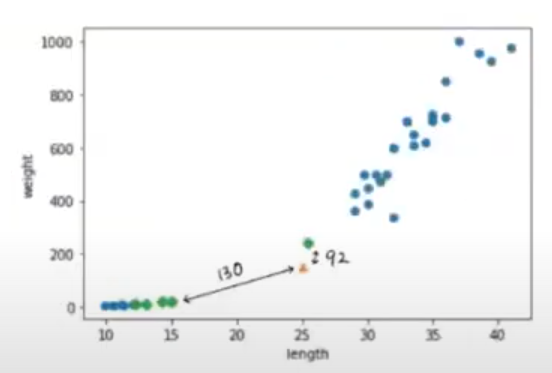

- 산점도를 다시 살펴 보니 삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리는 92이고, 그외 가장 가까운 샘플들 모두 130, 138 이다. 92와 130의 그래프 거리 비율이 이상하다.
- 그 이유는 x축이 10 ~ 40으로 범위가 좁고, y축은 0 ~ 1000으로 범위가 넓다. 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산되어 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못함을 알게 되었다.
- 그리하여 x축의 범위도 똑같이 0 ~ 1000의 범위로 지정하고자 한다.

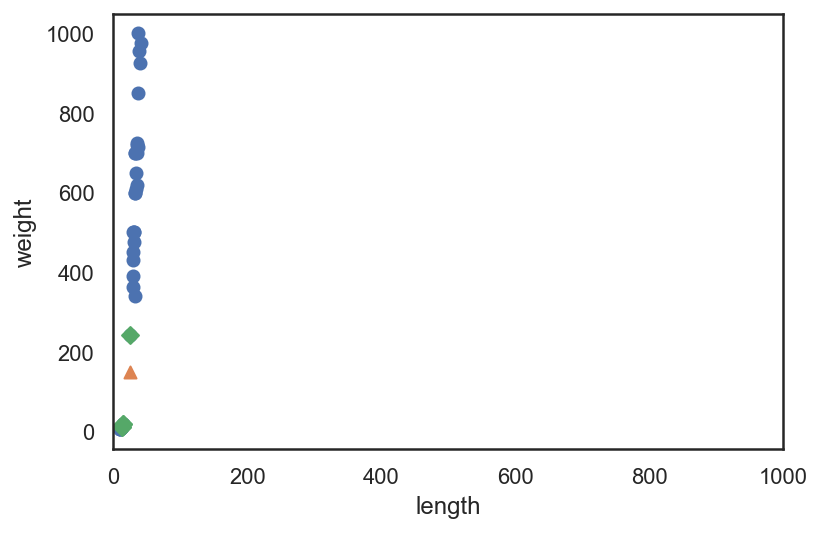

In [28]:
# x축 범위 재지정후 그래프로 나타내기 
plt.scatter(train_input[:,0], train_input[:,1]) 
plt.scatter(25, 150, marker='^')  # 예측값 데이터 
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # 받은 도미 샘플 데이터
plt.xlim(0, 1000)  # x축 범위 설정 0~1000
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축을 재설정하고 나니 산점도가 거의 일직선으로 나타난다. 해당 데이터라면 생서의 길이(x축)는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못하고, 오로지 생선의 무게(y축)만 고려대상이 된다.
- 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다르다, 이를 두 특성의 **스케일(scale)**이 다르다라고 말한다.
- 그리고 샘플 간의 거리에 영향을 많이 받는 위의 데이터를 제대로 사용하기위해 특성값을 일정한 기준으로 맞춰주는 작업을 **데이터 전처리(data preprocessing)** 라고 한다.
- 그 중에서 가장 널리 사용하는 전처리 방법 중 하나가 바로 **표준점수(standard score)** 이다.(혹은 z score라고도 한다.)
- 표준점수는 각 특성값이 0에서 표준편라의 몇 배만큼 떨어져 있는지를 나타내준다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

In [31]:
# 평균과 표준편차 구하기 
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

- np.mean() 함수는 평균을 np.std() 함수는 표준편차를 계산한다. 
- train_input은 (36, 2) 크기의 배열이다. 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다. 이를 위해 axis=0으로 지정, 행을 따라 각 열의 통계 값을 계산한다.

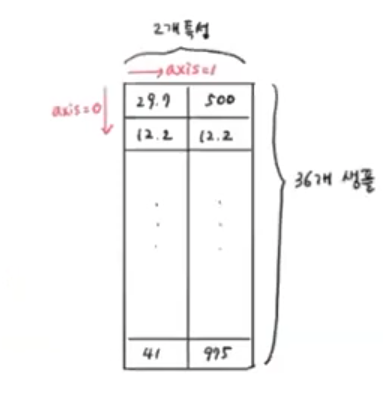

In [32]:
# 표준편차와 평균 출력
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


- 각 특성마다 평균과 표준편차가 구해짐, 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환해보자

In [34]:
# 표준점수로 변환
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

- train_input의 모든 행에서 mean에 있는 두 평균값을 빼고 std에 있는 두 표준편차를 다시 모든 행에 적용해서 계산함. 
- 이를 **브로드캐스팅(broadcasting)**이라고 부른다.
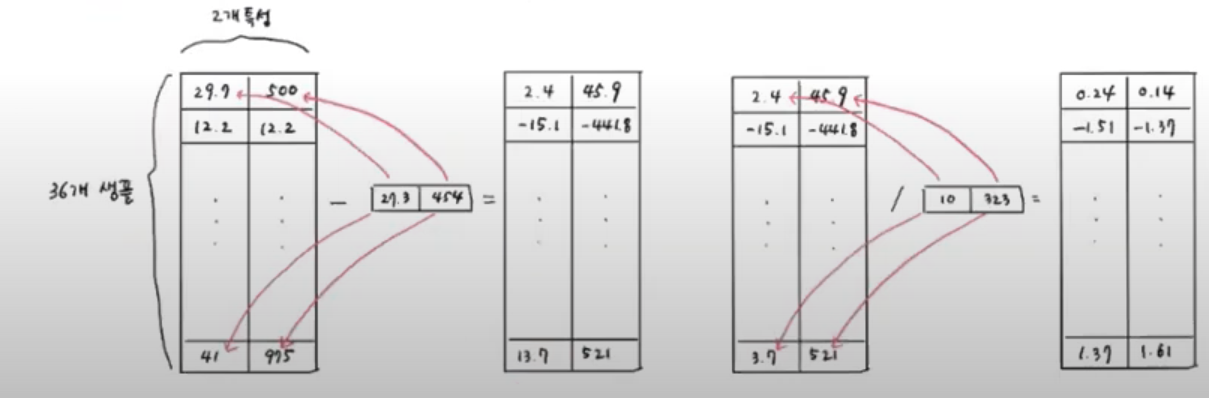

### 5. 전처리 데이터로 모델 훈련하기 

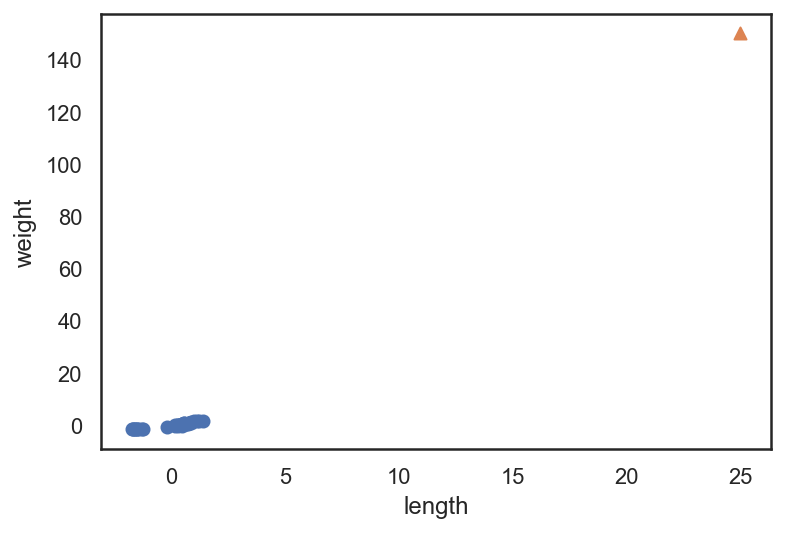

In [35]:
# 전처리한 데이터로 산점도 그래프 그리기
plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(25, 150, marker='^')  # 예측값 데이터 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 예상과 다르게 오른쪽 맨 꼭대기에 수상한 그 샘플 하나만 덩그러니 떨어져 있다. 그 이유는 훈련 세트를 평균으로 빼고 표준편차로 나누어 주었기 때문에 값의 범위가 달라졌기 때문이다. 
- 샘플 [25, 150]을 동일한 비율로 변환하지 않았기 때문에 훈련 세트의 평균과 표준편차를 이용해서 변환해줘야 한다.(매우중요한 작업이다.)

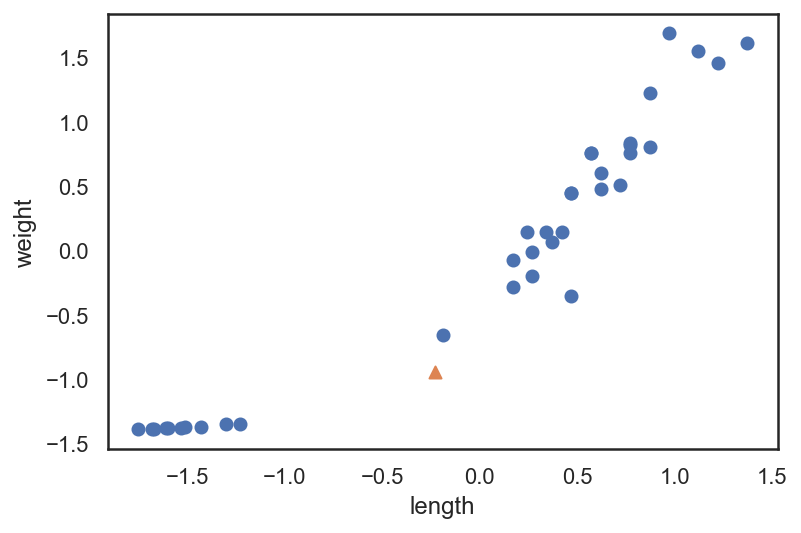

In [36]:
# 샘플의 동일한 비율로 변환 후 산점도 그래프로 다시 그리기 
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1]) 
plt.scatter(new[0], new[1], marker='^')  # 예측값 데이터 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 앞에 표준편차로 변환하기 전의 산점도 그래프와 흡사하다, 하지만 다른 점은 x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다. 
- 훈련 데이터의 두 특성이 비슷한 범위를 차지하고 있다. 이제 해당 데이터셋으로 KNeighborsClassifier 모델을 다시 훈련해보자

In [37]:
# 모델 재훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

- 훈련을 마치고 테스트 세트로 평가할 시 주의할 점은, 마찬가지로 훈련 세트의 평균과 표준편차로 변환해줘야 한다. 그렇지 않으면 데이터의 스케일이 같지 않아 훈련모델이 쓸모없게 된다.

In [38]:
# 테스트 세트 스케일 맞추기 - 평균과 표준편차로 변환
test_scaled = (test_input - mean) / std

In [39]:
# 최종 모델 평가
kn.score(test_scaled, test_target)

1.0

In [40]:
# 모델을 이용해서 예측 
print(kn.predict([new]))

[1.]


- 최종 결과 모델은 1.0으로 다시 100% 정확도를 나타냈고, 정확히 도미로 예측을 하였다.

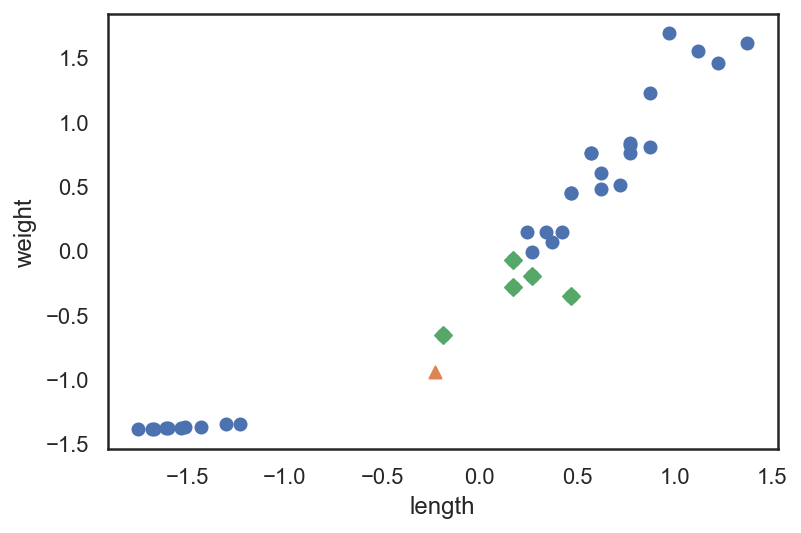

In [41]:
# 최종적으로 산점도 그래프 그려보기
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 스케일이 조정된 훈련 데이터 
plt.scatter(new[0], new[1], marker='^')  # 스케일이 조정된 도미 샘플 데이터
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 마지막으로 kneighbors() 함수로 샘플의 KNeighborsClassifier를 구한다음 산점도를 그려본 결과, 책에서 제공한 이상한 도미의 샘플에서 가장 가까운 샘플은 모두 도미로 나타났다.
- 특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만들었다.

### 문제 해결 과정 및 결론 
- 문제 해결 과정 
    - 첫 머신러닝 알고리즘을 바탕으로 다른 도미 샘플 데이터를 대입해보니 빙어라고 예측 
    - numpy이를 이용하여 train, test 데이터를 만들고 sklearn 패키지를 이용하여 train, test를 나눔.
    - 다시 모델을 평가하고 예측을 해보니 또 똑같이 빙어라고 예측 함, 산점도 그래프를 살펴보면 또 산점도가 도미에 가까움을 나타내는 희한한 상황이 발견됨.
    - 하지만 이는 각 특성마다 스케일이 다른 것임을 발견하고, 표준점수로 변환하여 스케일을 조정함.
- 결과 
    - 받은 도미 샘플 데이터를 다시 대입하여 모델을 평가하고 예측한 결과 정확도 100%, 도미를 제대로 예측함.
- 주의할 점
    - 대부분 머신러닝 알고리즘은 특성의 스케일이 다르면 잘 작동하지 않음, 이를 위해 특성을 표준점수로 변환함 (다른 방법도 있지만, 대부분의 경우 표준점수 변환의 방법을 사용함.)
    - 데이터 전처리를 할 때 주의할 점은 훈련 세트를 변환 방식 그대로 테스트 세트도 똑같이 변환해줘야 한다는 점이다. (안그러면 엉뚱하게 변환해서 모델이 쓸모없어지는 결과가 나온다.)